# Nome: Raylander Marques Melo
# Matrícula: 586108

In [9]:
!pip install numpy matplotlib scipy

  Using cached scipy-1.16.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
Using cached scipy-1.16.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.1 MB)


In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv

# Questão 1: Considere o conjunto de dados disponível em quake.csv, organizado em 2 colunas de atributos. Os dados referem-se a latitudes e longitudes de locais em que foram registrados terremotos. Maiores detalhes sobre os dados podem ser conferidos em https://www.openml.org/d/772.

In [2]:
data = np.genfromtxt("quake.csv", delimiter=',')

In [4]:
def plot_clusters(data, centroids, clusters):
    plt.figure(figsize=(12, 8))
    colors = plt.cm.tab20.colors
    
    for i, cluster in enumerate(clusters):
        if not cluster:
            continue
        cluster_array = np.array(cluster)
        plt.scatter(cluster_array[:, 0], cluster_array[:, 1], 
                   color=colors[i], label=f'Cluster {i+1}', alpha=0.6)
    
    centroids_array = np.array(centroids)
    plt.scatter(centroids_array[:, 0], centroids_array[:, 1],
               color='black', marker='X', s=200, label='Centróides')
    
    plt.title(f'Agrupamento K-means com Mahalanobis (k={len(centroids)})')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.legend()
    plt.grid(True)
    plt.show()


## a) valie o algoritmo K-médias com distância Euclidiana na tarefa de agrupamento para tais dados. O número de grupos deve ser escolhido entre os valores 4,5,6,...,19,20 a partir do índice DB (Davies-Bouldin). Plote o melhor resultado de agrupamento obtido. 
## Observação: Em cada avaliação repita múltiplas vezes (por exemplo, 20) a execução do algoritmo K-médias, escolhendo a solução com melhor erro de reconstrução.

k=4, DB Index=0.6936
k=5, DB Index=0.6923
k=6, DB Index=0.5503
k=7, DB Index=0.5318
k=8, DB Index=0.6455
k=9, DB Index=0.6712
k=10, DB Index=0.6161
k=11, DB Index=0.6576
k=12, DB Index=0.6854
k=13, DB Index=0.7139
k=14, DB Index=0.6573
k=15, DB Index=0.6728
k=16, DB Index=0.7194
k=17, DB Index=0.6619
k=18, DB Index=0.6990
k=19, DB Index=0.6159
k=20, DB Index=0.6195

Melhor k encontrado: 7 com score DB: 0.5318


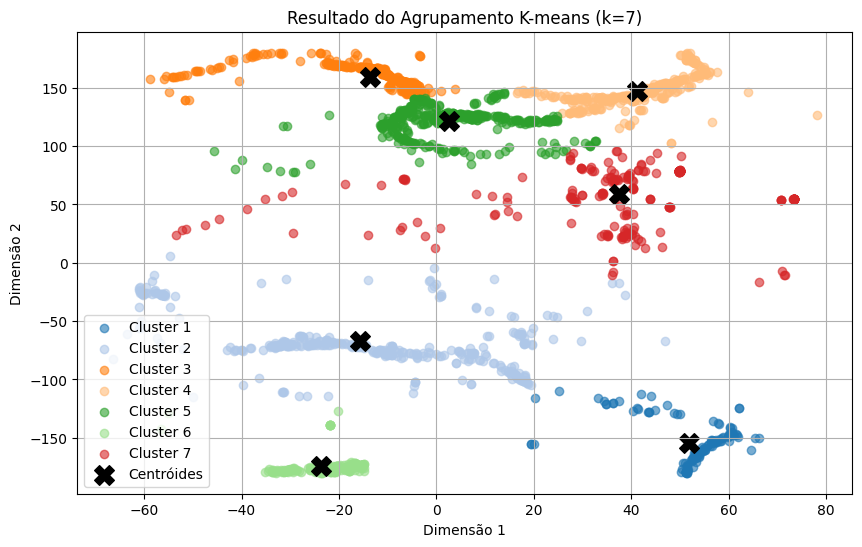

In [ ]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

def compute_cluster_errors(data, centroids, clusters):
    errors = []
    for i, cluster in enumerate(clusters):
        centroid = centroids[i]
        error = sum(euclidean_distance(point, centroid) ** 2 for point in cluster)
        errors.append(error)
    return sum(errors)

def davies_bouldin_index(data, centroids, clusters):
    intra_distances = []
    n_clusters = len(centroids)
    
    # Calcula as distâncias intra-cluster
    for i, cluster in enumerate(clusters):
        if not cluster:
            return float('inf')  # penaliza clusters vazios
        
        centroid = centroids[i]
        s_i = sum(euclidean_distance(point, centroid) for point in cluster) / len(cluster)
        intra_distances.append(s_i)
    
    db_index = 0.0
    
    for i in range(n_clusters):
        max_ratio = -float('inf')
        for j in range(n_clusters):
            if i != j:
                d_ij = euclidean_distance(centroids[i], centroids[j])
                ratio = (intra_distances[i] + intra_distances[j]) / d_ij
                if ratio > max_ratio:
                    max_ratio = ratio
        db_index += max_ratio
    
    return db_index / n_clusters

def kmeans(data, k, n_init=20, max_iterations=100, distance = "euclidian"):
    # Converte para lista se for numpy array
    if isinstance(data, np.ndarray):
        data = data.tolist()
    
    best_centroids = None
    best_clusters = None
    best_error = float('inf')
    
    for _ in range(n_init):
        # Inicialização aleatória - agora usando indices para evitar problemas com tipos
        indices = random.sample(range(len(data)), k)
        centroids = [data[i] for i in indices]
        clusters = None
        
        for _ in range(max_iterations):
            # Passo de atribuição
            clusters = [[] for _ in range(k)]
            for point in data:
                if distance == "euclidian":
                    distances = [euclidean_distance(point, centroid) for centroid in centroids]
                else 
                closest = distances.index(min(distances))
                clusters[closest].append(point)
            
            # Passo de atualização
            new_centroids = []
            for cluster in clusters:
                if cluster:
                    # Calcula a média em cada dimensão
                    new_centroid = [sum(dim)/len(cluster) for dim in zip(*cluster)]
                    new_centroids.append(new_centroid)
                else:
                    # Re-inicializa centróides vazios
                    new_centroids.append(random.choice(data))
            
            # Verifica convergência
            if new_centroids == centroids:
                break
                
            centroids = new_centroids
        
        # Avalia esta execução
        current_error = compute_cluster_errors(data, centroids, clusters)
        if current_error < best_error:
            best_error = current_error
            best_centroids = centroids
            best_clusters = clusters
    
    return best_centroids, best_clusters

def find_optimal_k(data, k_range=range(4, 21)):
    k_scores = []
    
    for k in k_range:
        centroids, clusters = kmeans(data, k)
        db_score = davies_bouldin_index(data, centroids, clusters)
        k_scores.append((k, db_score))
        print(f"k={k}, DB Index={db_score:.4f}")
    
    # Ordena por melhor score (menor DB)
    k_scores.sort(key=lambda x: x[1])
    best_k, best_score = k_scores[0]
    
    print(f"\nMelhor k encontrado: {best_k} com score DB: {best_score:.4f}")
    
    # Roda novamente com o melhor k para pegar os clusters
    best_centroids, best_clusters = kmeans(data, best_k)
    
    return best_k, best_centroids, best_clusters

# Exemplo de uso com dados simulados
if __name__ == "__main__":
    
    # Encontrar o melhor k
    best_k, centroids, clusters = find_optimal_k(data)
    
    # Plotar o resultado
    plot_clusters(data, centroids, clusters)

## b) Repita o item anterior considerando a distância de Mahalanobis.
## Observação: Note que o índice DB deve ser alterado para usar a distância de Mahalanobis neste item.

Calculando para k=4...
k=4, DB Index=0.3395
Calculando para k=5...
k=5, DB Index=0.3052
Calculando para k=6...
k=6, DB Index=0.5701
Calculando para k=7...
k=7, DB Index=0.2091
Calculando para k=8...
k=8, DB Index=0.1558
Calculando para k=9...
k=9, DB Index=0.2233
Calculando para k=10...
k=10, DB Index=0.5733
Calculando para k=11...
k=11, DB Index=0.1336
Calculando para k=12...
k=12, DB Index=0.2423
Calculando para k=13...
k=13, DB Index=0.3801
Calculando para k=14...
k=14, DB Index=0.3657
Calculando para k=15...
k=15, DB Index=0.4885
Calculando para k=16...
k=16, DB Index=0.5606
Calculando para k=17...
k=17, DB Index=1.1233
Calculando para k=18...
k=18, DB Index=0.3369
Calculando para k=19...
k=19, DB Index=1.0484
Calculando para k=20...
k=20, DB Index=0.4891

Melhor k encontrado: 11 com score DB: 0.1336


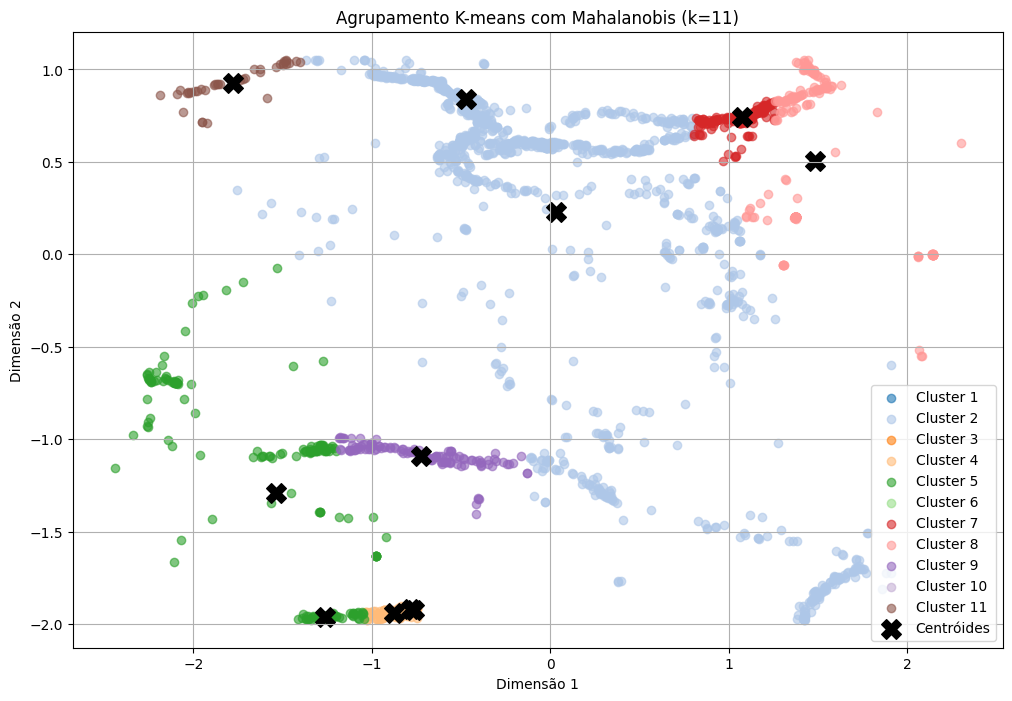

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import pinv

def mahalanobis_distance(point, centroid, inv_cov_matrix):
    diff = np.array(point) - np.array(centroid)
    try:
        # Verificação adicional de validade da matriz inversa
        if not np.all(np.isfinite(inv_cov_matrix)):
            return 1e3  # Valor menor para evitar dominância no DBI
        
        mdist_sq = np.dot(np.dot(diff.T, inv_cov_matrix), diff)
        mdist_sq = max(0, mdist_sq)  # Garante não negativo
        distance = np.sqrt(mdist_sq)
        
        # Limitação mais conservadora
        return min(distance, 1e3) if np.isfinite(distance) else 1e3
    except:
        return 1e3  # Valor reduzido para evitar distorção no DBI

def compute_covariance_matrix(cluster, reg_factor=1e-6):
    if len(cluster) < 2:
        dim = len(cluster[0]) if cluster else 2
        return np.eye(dim) * (1 + reg_factor)
    
    cluster_array = np.array(cluster)
    cov_matrix = np.cov(cluster_array, rowvar=False, bias=True)
    
    # Verificação de condicionamento da matriz
    min_eig = np.min(np.real(np.linalg.eigvals(cov_matrix)))
    if min_eig < 0:
        cov_matrix -= (min_eig - reg_factor) * np.eye(cov_matrix.shape[0])
    
    # Regularização adaptativa mais conservadora
    avg_variance = np.trace(cov_matrix)/cov_matrix.shape[0]
    adaptive_reg = max(reg_factor, 0.5 * avg_variance)  # Aumentado de 0.1 para 0.5
    
    return cov_matrix + np.eye(cov_matrix.shape[0]) * adaptive_reg

def compute_cluster_errors(data, centroids, clusters, inv_cov_matrices):
    errors = []
    for i, cluster in enumerate(clusters):
        if not cluster:
            errors.append(0)
            continue
            
        centroid = centroids[i]
        inv_cov = inv_cov_matrices[i]
        error = sum(min(mahalanobis_distance(point, centroid, inv_cov), 1e3)**2 
                for point in cluster)
        errors.append(error)
    return sum(errors)

def davies_bouldin_index(data, centroids, clusters, inv_cov_matrices):
    intra_distances = []
    n_clusters = len(centroids)
    
    # Verificação preliminar
    if n_clusters < 2:
        return 1e3  # Retorna valor alto mas não extremo
    
    for i, cluster in enumerate(clusters):
        if len(cluster) < 1:  # Cluster vazio
            return 1e3
        
        try:
            centroid = centroids[i]
            inv_cov = inv_cov_matrices[i]
            distances = [min(mahalanobis_distance(p, centroid, inv_cov), 1e3) 
                        for p in cluster]
            s_i = np.mean(distances) if distances else 1e3
            intra_distances.append(s_i)
        except:
            return 1e3
    
    db_index = 0.0
    valid_pairs = 0
    
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                try:
                    # Usa a média das matrizes de covariância para maior estabilidade
                    combined_inv_cov = 0.5 * (inv_cov_matrices[i] + inv_cov_matrices[j])
                    d_ij = mahalanobis_distance(centroids[i], centroids[j], combined_inv_cov)
                    d_ij = max(d_ij, 1e-6)  # Evita divisão por zero
                    
                    ratio = (intra_distances[i] + intra_distances[j]) / d_ij
                    max_ratio = max(max_ratio, min(ratio, 1e3))  # Limite mais baixo
                    valid_pairs += 1
                except:
                    continue
        
        if valid_pairs > 0:
            db_index += max_ratio
    
    return db_index / max(1, n_clusters) if valid_pairs > 0 else 1e3

def kmeans_mahalanobis(data, k, n_init=20, max_iterations=100):
    if isinstance(data, np.ndarray):
        data = data.tolist()
    
    best_centroids = None
    best_clusters = None
    best_inv_covs = None
    best_error = float('inf')
    
    for _ in range(n_init):
        # Inicialização mais robusta usando k-means++
        centroids = [random.choice(data)]
        for _ in range(1, k):
            distances = [min([mahalanobis_distance(x, c, np.eye(len(data[0]))) 
                         for c in centroids]) for x in data]
            probs = distances / np.sum(distances)
            centroids.append(data[np.random.choice(len(data), p=probs)])
        
        clusters = [[] for _ in range(k)]
        
        # Distribuição inicial balanceada
        for i, point in enumerate(data):
            clusters[i % k].append(point)
        
        inv_cov_matrices = []
        for cluster in clusters:
            cov_matrix = compute_covariance_matrix(cluster)
            inv_cov_matrices.append(pinv(cov_matrix))
        
        for _ in range(max_iterations):
            # Passo de atribuição com tratamento de erros
            new_clusters = [[] for _ in range(k)]
            for point in data:
                distances = []
                for i in range(k):
                    try:
                        dist = mahalanobis_distance(point, centroids[i], inv_cov_matrices[i])
                        distances.append(dist)
                    except:
                        distances.append(1e5)  # Valor grande se houver erro
                
                closest = np.argmin(distances)
                new_clusters[closest].append(point)
            
            clusters = new_clusters
            
            # Verifica e corrige clusters vazios
            for i in range(k):
                if not clusters[i]:
                    # Encontra o ponto mais distante de seu centróide atual
                    farthest_point = max(
                        (p for cluster in clusters for p in cluster),
                        key=lambda x: min(
                            mahalanobis_distance(x, c, inv_cov) 
                            for c, inv_cov in zip(centroids, inv_cov_matrices)
                        )
                    )
                    clusters[i].append(farthest_point)
            
            # Atualização dos centróides e matrizes
            new_centroids = []
            new_inv_covs = []
            for cluster in clusters:
                if cluster:
                    new_centroid = np.mean(cluster, axis=0).tolist()
                    new_centroids.append(new_centroid)
                    cov_matrix = compute_covariance_matrix(cluster)
                    new_inv_covs.append(pinv(cov_matrix))
                else:
                    # Não deve acontecer devido ao tratamento acima
                    new_centroids.append(random.choice(data))
                    new_inv_covs.append(np.eye(len(data[0])))
            
            # Verifica convergência
            if (np.allclose(np.array(new_centroids), np.array(centroids), rtol=1e-5) and
                all(np.allclose(new_inv_covs[i], inv_cov_matrices[i], rtol=1e-5) 
                    for i in range(k))):
                break
                
            centroids, inv_cov_matrices = new_centroids, new_inv_covs
        
        # Avaliação final
        current_error = compute_cluster_errors(data, centroids, clusters, inv_cov_matrices)
        if current_error < best_error:
            best_error = current_error
            best_centroids = centroids
            best_clusters = clusters
            best_inv_covs = inv_cov_matrices
    
    return best_centroids, best_clusters, best_inv_covs

def find_optimal_k(data, k_range=range(4, 21)):
    k_scores = []
    
    for k in k_range:
        print(f"Calculando para k={k}...")
        centroids, clusters, inv_covs = kmeans_mahalanobis(data, k, n_init=10)
        db_score = davies_bouldin_index(data, centroids, clusters, inv_covs)
        k_scores.append((k, db_score))
        print(f"k={k}, DB Index={db_score:.4f}")
    
    # Filtra apenas resultados válidos
    valid_scores = [(k, score) for k, score in k_scores if score < 1e6]
    
    if not valid_scores:
        print("Aviso: Não foi possível calcular scores válidos. Usando k mínimo.")
        best_k = min(k_range)
        best_score = float('inf')
    else:
        valid_scores.sort(key=lambda x: x[1])
        best_k, best_score = valid_scores[0]
    
    print(f"\nMelhor k encontrado: {best_k} com score DB: {best_score:.4f}")
    
    # Execução final com o melhor k
    best_centroids, best_clusters, _ = kmeans_mahalanobis(data, best_k, n_init=20)
    
    return best_k, best_centroids, best_clusters

if __name__ == "__main__":
    
    # Normalização dos dados
    data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    
    best_k, centroids, clusters = find_optimal_k(data)
    plot_clusters(data, centroids, clusters)

# Questão 2: Considere o conjunto de dados disponível em penguins.csv, organizado em 5 colunas, sendo 4 colunas de atributos e a última a classe do padrão. Os dados referem-se a medições anatômicas de pinguins da Antártida, classificados nas espécies Adelie, Chinstrap e Gentoo. Maiores detalhes sobre os dados podem ser conferidos em https://allisonhorst.github.io/palmerpenguins/.

In [69]:
data = np.genfromtxt("penguins.csv", delimiter=',')
X = data[:, :-1]  # Todas as colunas menos a última
y = data[:, -1]   # Última coluna como rótulos

In [72]:
def pca(X, n_components=2):
    # 1. Padronização dos dados
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # 2. Matriz de covariância
    cov_mat = np.cov(X_std, rowvar=False)
    
    # 3. Autovalores e autovetores
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    
    # 4. Ordenar autovetores pelos autovalores (decrescente)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx]
    
    # 5. Selecionar os "n_components" primeiros componentes
    W = eigenvectors_sorted[:, :n_components]
    
    # 6. Projetar os dados nos novos eixos
    X_proj = X_std.dot(W)
    
    return X_proj, eigenvalues_sorted

In [86]:
def plot_pca(X_pca, y, pc1=1, pc2=2, pc3=None):
        classes = np.unique(y)
        colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}  # Adicione mais cores se necessário
        
        # Ajusta índices para Python (começam em 0)
        pc1_idx = pc1 - 1
        pc2_idx = pc2 - 1
        
        if pc3 is not None:
            # Plot 3D
            pc3_idx = pc3 - 1
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            
            for cls in classes:
                mask = (y == cls)
                ax.scatter(X_pca[mask, pc1_idx], 
                        X_pca[mask, pc2_idx], 
                        X_pca[mask, pc3_idx], 
                        label=f'Classe {cls}', 
                        c=colors[cls])
            
            ax.set_xlabel(f'PC{pc1}')
            ax.set_ylabel(f'PC{pc2}')
            ax.set_zlabel(f'PC{pc3}')
            ax.set_title('PCA - Visualização 3D')
        else:
            # Plot 2D
            plt.figure(figsize=(8, 6))
            for cls in classes:
                mask = (y == cls)
                plt.scatter(X_pca[mask, pc1_idx], 
                            X_pca[mask, pc2_idx], 
                            label=f'Classe {cls}', 
                            c=colors[cls])
            
            plt.xlabel(f'PC{pc1}')
            plt.ylabel(f'PC{pc2}')
            plt.title('PCA - Visualização 2D')
        
        plt.legend()
        plt.grid()
        plt.show()

## a) Apresente a projeção em 2 dimensões dos padrões acima obtida pelo método PCA (análise dos componentes principais).

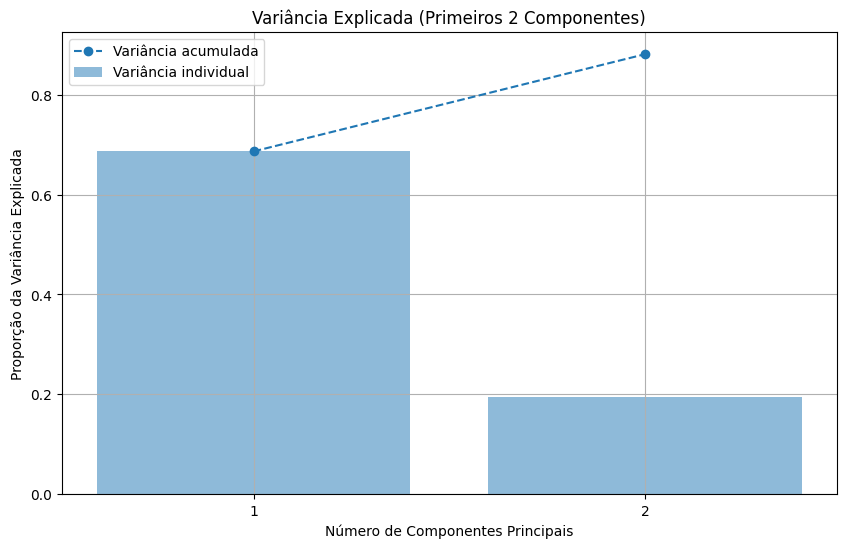

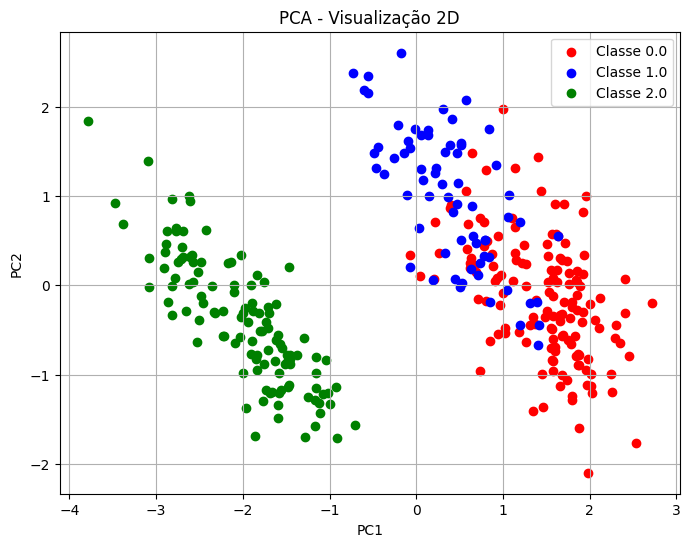

In [ ]:
# Aplicando PCA e obtendo os autovalores
X_pca, eigenvalues = pca(X, n_components=2)

n_components = 2  # Número de componentes que você quer usar

# Aplicar PCA e pegar todos os autovalores
X_pca, eigenvalues = pca(X, n_components=n_components)  # Força calcular todos

# Filtrar apenas os primeiros `n_components` autovalores
explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotar apenas os `n_components` selecionados
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, 
         marker='o', linestyle='--', label='Variância acumulada')
plt.bar(range(1, n_components + 1), explained_variance_ratio, 
        alpha=0.5, align='center', label='Variância individual')

plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.title(f'Variância Explicada (Primeiros {n_components} Componentes)')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.grid(True)
plt.show()

plot_pca(X_pca, y)

## b) Ainda considerando o item anterior, calcule e mostre a variância explicada obtida quando a dimensão projetada é modificada (1,2,3 ou 4).
## Observação: Não esqueça de normalizar os dados em ambas as questões.
## Observação: Você deve implementar o seu próprio PCA, mas pode usar uma implementação já existente do SVD para isso.

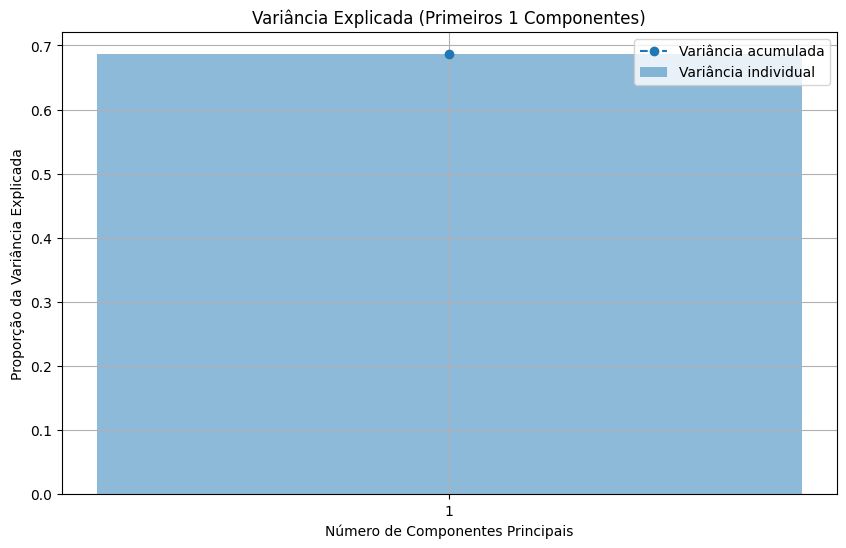

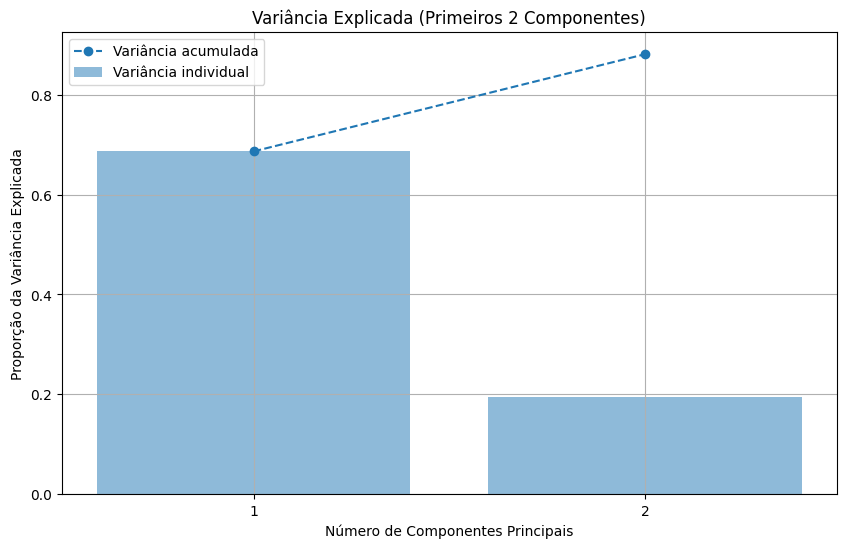

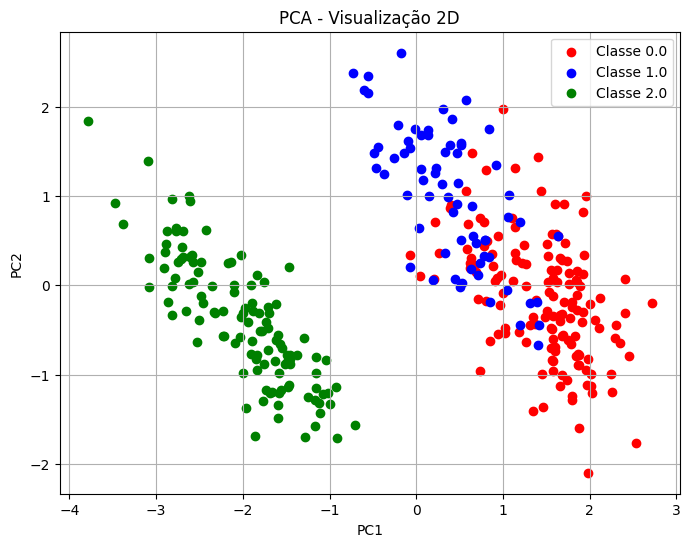

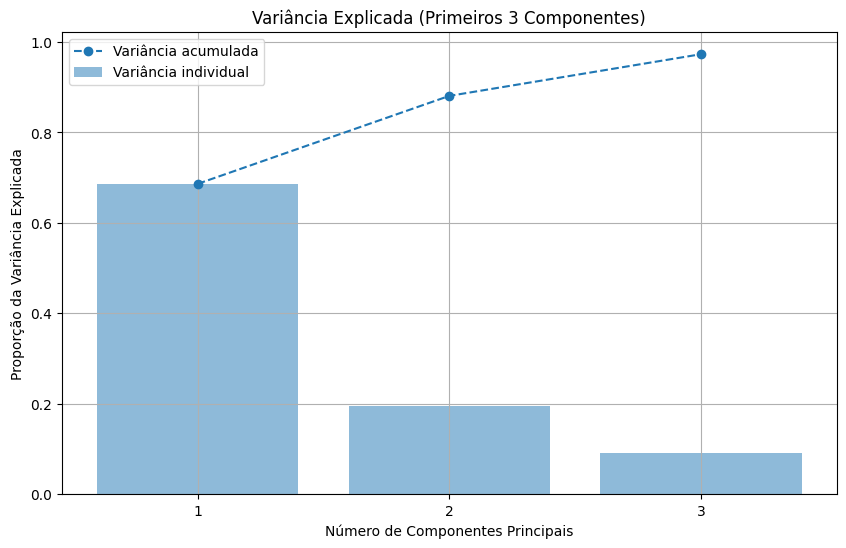

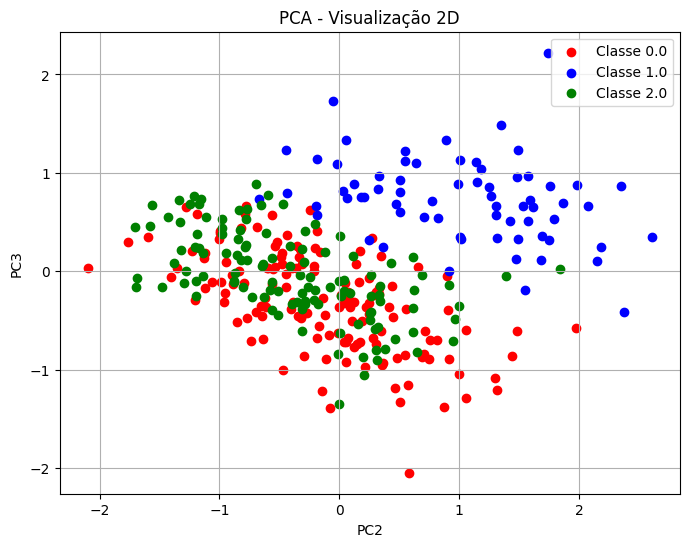

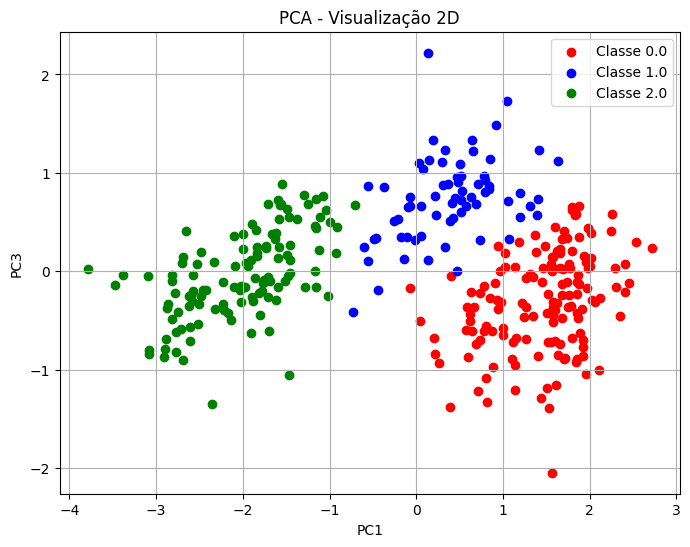

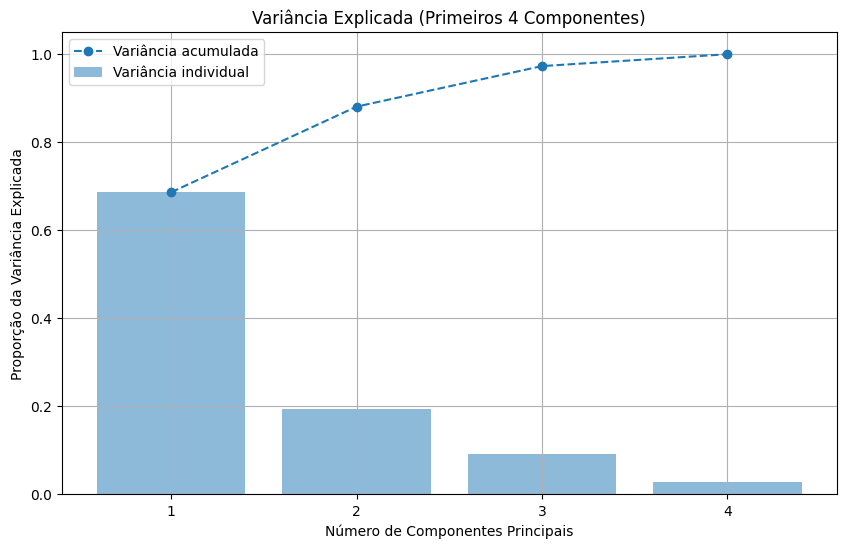

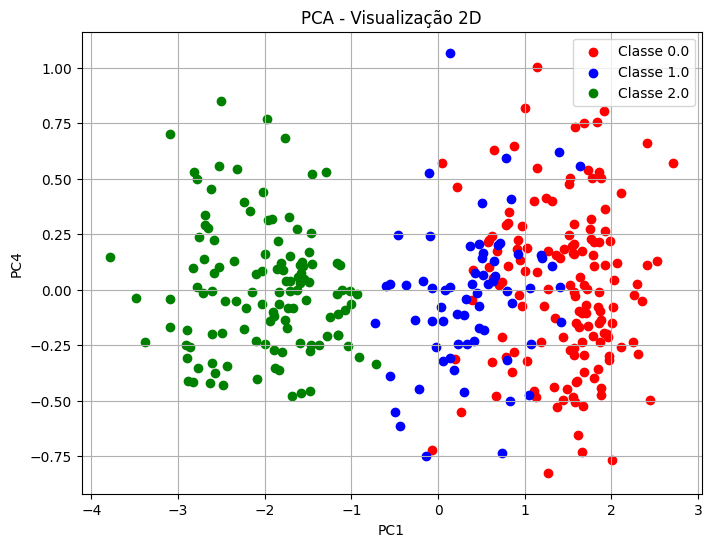

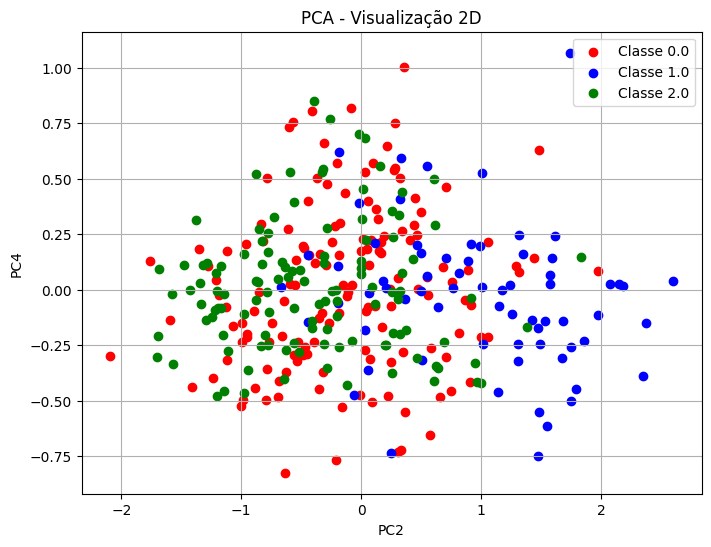

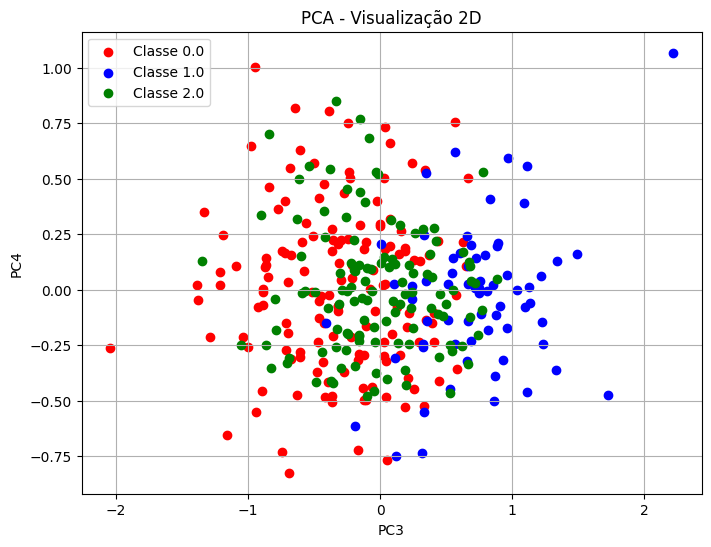

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para 3D

for i in range(1,5):
    # Aplicar PCA
    X_pca = pca(X, n_components=i)

    # Aplicando PCA e obtendo os autovalores
    X_pca, eigenvalues = pca(X, n_components=2)

    n_components = i  # Número de componentes que você quer usar

    # Aplicar PCA e pegar todos os autovalores
    X_pca, eigenvalues = pca(X, n_components=n_components)  # Força calcular todos

    # Filtrar apenas os primeiros `n_components` autovalores
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plotar apenas os `n_components` selecionados
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), cumulative_explained_variance, 
            marker='o', linestyle='--', label='Variância acumulada')
    plt.bar(range(1, n_components + 1), explained_variance_ratio, 
            alpha=0.5, align='center', label='Variância individual')

    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Proporção da Variância Explicada')
    plt.title(f'Variância Explicada (Primeiros {n_components} Componentes)')
    plt.xticks(range(1, n_components + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    if i == 2:
        plot_pca(X_pca, y)
    if i == 3:
        plot_pca(X_pca, y, pc1=2, pc2=3)
    if i == 3:
        plot_pca(X_pca, y, pc1=1, pc2=3)    
    if i == 4:
        plot_pca(X_pca, y, pc1=1, pc2=4)
    if i == 4:
        plot_pca(X_pca, y, pc1=2, pc2=4)
    if i == 4:
        plot_pca(X_pca, y, pc1=3, pc2=4)
